# EDA ON Haberman Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('haberman.csv')

In [3]:
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [8]:
df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [17]:
df.shape

(306, 4)

In [10]:
df['status'].unique()

array([1, 2], dtype=int64)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [16]:
df['nodes'].sort_values()

244     0
217     0
220     0
224     0
102     0
       ..
252    28
9      30
215    35
174    46
62     52
Name: nodes, Length: 306, dtype: int64

In [35]:
df['age'].sort_values()

0      30
1      30
2      30
3      31
4      31
       ..
301    75
302    76
303    77
304    78
305    83
Name: age, Length: 306, dtype: int64

## Understanding Dataset:

**age:**  Age of the patient

**year:** Year in which the operation was performed (1958-1970)

**node:** axillary lymph nodes are near the breasts, they are often the first location to which breast cancer spreads if it moves beyond the breast tissue. The number of axillary lymph nodes can vary from person to person, ranging from five nodes to more than 30.

**status:** 1 for survival for >= 5 years
            2 for survival for < 5 years

#### OBJECTIVE: TO ANALYSE AND SEE WHICH FEATURES ARE MOST RELEVANT FOR CLASSIFYING THE PATIENT AMONG THE SURVIVAL OR DEATH CLASSES, TO DETECT ANY TRENDS AND CORRELATION AMONGST THE FEATURES

In [18]:
df['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

In [60]:
print('%age of patients survived in dataset:', len(df[df['status']==1])*100/len(df['status']))
print('%age of patients who did not survive in dataset:', len(df[df['status']==2])*100/len(df['status']))

%age of patients survived in dataset: 73.52941176470588
%age of patients who did not survive in dataset: 26.470588235294116


In [66]:
print('Average age of patients', sum(df['age'])/len(df['age']))
print('Average age of patients survived', np.mean(df[df['status']==1]['age']))
print('Average age of patients who did not survive', np.mean(df[df['status']==2]['age']))

Average age of patients 52.45751633986928
Average age of patients survived 52.01777777777778
Average age of patients who did not survive 53.67901234567901


In [68]:
print('Average no. of nodes of patients', np.mean(df['nodes']))
print('Average no. of nodes of patients who survived', np.mean(df[df['status']==1]['nodes']))
print('Average no. of nodes of patients who did not survive', np.mean(df[df['status']==2]['nodes']))

Average no. of nodes of patients 4.026143790849673
Average no. of nodes of patients who survived 2.7911111111111113
Average no. of nodes of patients who did not survive 7.45679012345679


In [69]:
print('Average year of operation of patients', np.mean(df['year']))
print('Average year of operation of patients who survived', np.mean(df[df['status']==1]['year']))
print('Average year of operation of patients who did not survive', np.mean(df[df['status']==2]['year']))

Average year of operation of patients 62.85294117647059
Average year of operation of patients who survived 62.86222222222222
Average year of operation of patients who did not survive 62.82716049382716


As we can see, **73.5%** of total entries are for **status 1 (who survived)**, so this dataset seems a bit **unbalanced**.

## UNIVARIATE ANALYSIS

### PDF, Histogram

##### age:

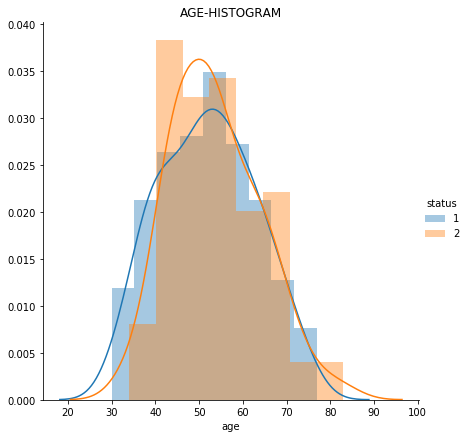

In [4]:
sns.FacetGrid(data=df,hue = 'status',height =6).map(sns.distplot, 'age').add_legend()
plt.title('AGE-HISTOGRAM', loc = 'center')
plt.show()

**Observation**: 
1. The age groups do not classify the survival status well as for both the status age is distributed from 30 to 83.
2. For status 1, age is from 30 to 77 while for status 2, age is distributed from 34 to 83.
3. The PDF overlaps almost everywhere.
4. The peak of the PDF for both the classes lie amost in sasme age range between 50-60. 


##### year:

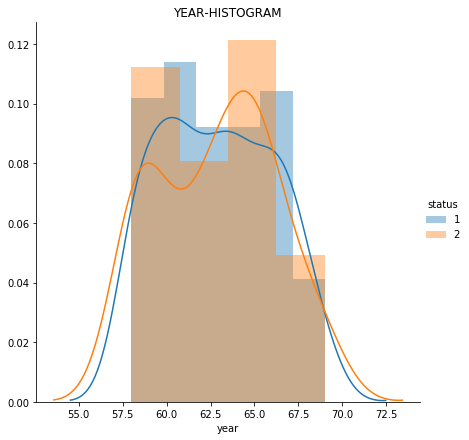

In [5]:
sns.FacetGrid(data=df,hue = 'status',height =6).map(sns.distplot, 'year').add_legend()
plt.title('YEAR-HISTOGRAM', loc = 'center')
plt.show()

**Observation**
1. Year of operation cannot help in classifying as all the data is uniformly distributed over 1958-1970 for both status.

##### nodes:

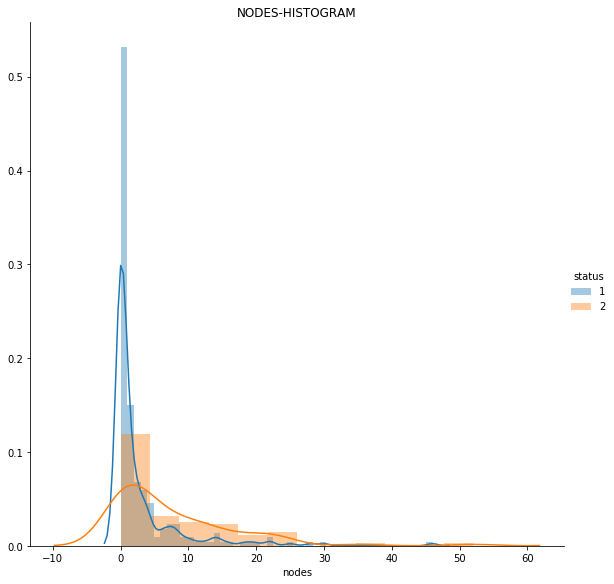

In [6]:
sns.FacetGrid(data=df,hue = 'status',height =8).map(sns.distplot, 'nodes').add_legend()
plt.title('NODES-HISTOGRAM', loc = 'center')
plt.show()

**Observation**
1. The spread or standard deviation of status 1 (survived) data is pretty much less as compared to that of status 2 (death) data.
2. Although it does not show any sharp classifying boundaries.
3. PDF of both is overlapping almost everywhere.
4. However we can say that if nodes are less than 5, probabilty of being is status 1 (survived) is much more.

### CDF

##### age:

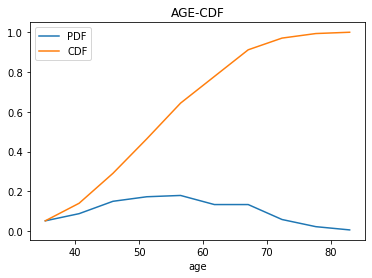

In [7]:
#plotting CDF for age.

counts, bin_edges = np.histogram(df['age'], bins =10,density = True )
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
x = bin_edges[1:]
plt.plot(x,pdf, label = 'PDF')
plt.plot(x,cdf, label='CDF')
plt.xlabel('age')
plt.legend()
plt.title('AGE-CDF', loc = 'center')
plt.show()

**Observataion**
1. Quite uniform throughout the age range.

##### year:

[0.13517528 0.07278669 0.090612   0.08318479 0.07278669]
[58.  60.2 62.4 64.6 66.8 69. ]


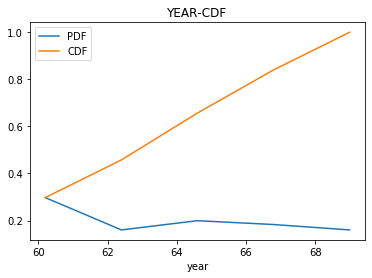

In [8]:
#plotting CDF for age.

counts, bin_edges = np.histogram(df['year'], bins = 5, density = True )
print(counts)
print(bin_edges)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
x = bin_edges[1:]
plt.plot(x,pdf, label = 'PDF')
plt.plot(x,cdf, label='CDF')
plt.xlabel('year')
plt.legend()
plt.title('YEAR-CDF', loc = 'center')
plt.show()

**Observation**
1. Uniform distribution of operations with slight  variations in initial years.

##### node:

[0.14831574 0.0188537  0.01131222 0.00502765 0.00565611 0.00125691
 0.00062846 0.         0.00062846 0.00062846]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


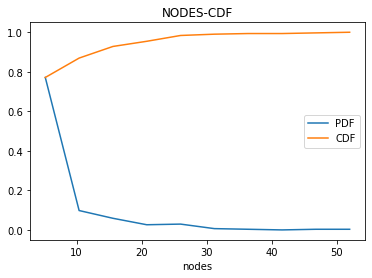

In [9]:
#plotting CDF for age.

counts, bin_edges = np.histogram(df['nodes'], bins = 10, density = True )
print(counts)
print(bin_edges)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
x = bin_edges[1:]
plt.plot(x,pdf, label = 'PDF')
plt.plot(x,cdf, label='CDF')
plt.xlabel('nodes')
plt.legend()
plt.title('NODES-CDF', loc = 'center')
plt.show()

**Observation**
1. Majority of cases are with nodes less than 5 (around 80%).

### Box Plot

##### age:

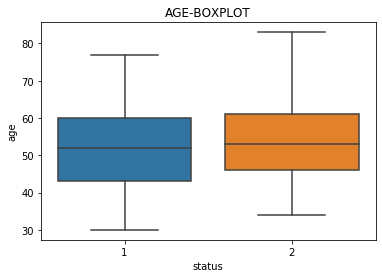

In [10]:
sns.boxplot(x='status', y='age', data=df)
plt.title('AGE-BOXPLOT', loc = 'center')
plt.show()

**Observation**
1. The median age of status 1 (survived) is around 52 whereas that for status 2 (death) is also near 53.
2. Around 25% of patients were less than 43 years of age who survived.
3. Around 25% of patients were less than 46 years of age who died.
4. Inter quartile range (range for values within 25 and 75 percentile) for status 1 (survived) is around 43 to 60 = 17 years.
5. Inter quartile range (range for values within 25 and 75 percentile) for status 2 (died) is around 46 to 61 = 15 years.

##### year:


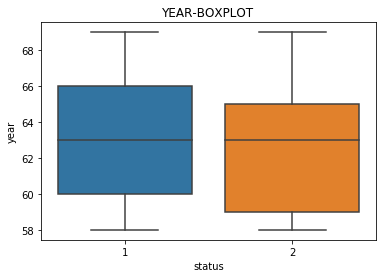

In [11]:
sns.boxplot(x='status', y='year', data=df)
plt.title('YEAR-BOXPLOT', loc = 'center')
plt.show()

**Observation**
1. The median year of operation of status 1 (survived) is around 1963 whereas that for status 2 (death) is also 1963.
2. Around 25% of patients who survived were operated before 1960.
3. Around 25% of patients who did not survive were operated before 1959.
4. Inter quartile range (range for values within 25 and 75 percentile) for status 1 (survived) is around 1960 to 1966.
5. Inter quartile range (range for values within 25 and 75 percentile) for status 2 (died) is around 1959 to 1965

##### node:

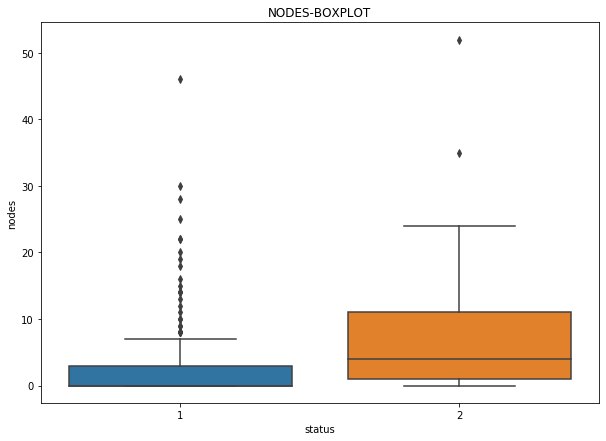

In [12]:
plt.figure(figsize=(10,7))
sns.boxplot(x='status', y='nodes', data=df)
plt.title('NODES-BOXPLOT', loc = 'center')
plt.show()

**Observation**
1. The median no. nodes of status 1 (survived) is around 0 whereas that for status 2 (death) is around 4.
2. Around 50% of patients who survived had nodes 0 .
3. Around 25% of patients who died had nodes less than 1.
4. Inter quartile range (range for values within 25 and 75 percentile) for status 1 (survived) is around 0 to 3
5. Inter quartile range (range for values within 25 and 75 percentile) for status 2 (died) is around 1 to 11
6. More than 75% of patients who survived had no. of nodes less than the median no. of nodes of those who died.
7. So, clearly more no. of nodes is a sign of status 2 but a lot od outliers are present so still cannot comment.

### Violin Plot

##### age:

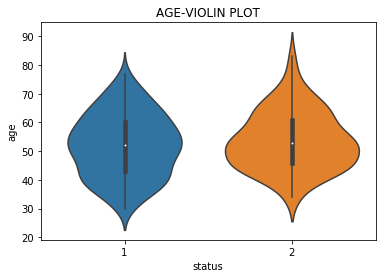

In [13]:
sns.violinplot(x='status', y='age', data =df)
plt.title('AGE-VIOLIN PLOT', loc = 'center')
plt.show()

##### year:

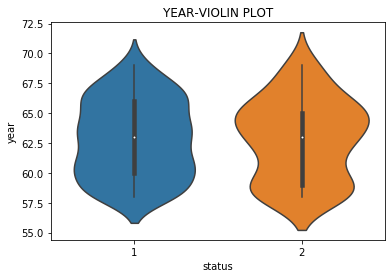

In [14]:
sns.violinplot(x='status', y='year', data =df)
plt.title('YEAR-VIOLIN PLOT', loc = 'center')
plt.show()

##### nodes:

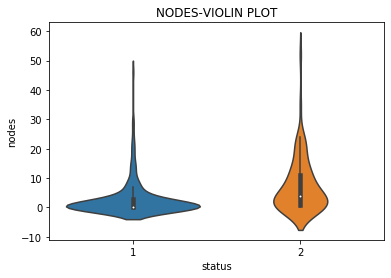

In [15]:
sns.violinplot(x='status', y='nodes', data =df)
plt.title('NODES-VIOLIN PLOT', loc = 'center')
plt.show()

## BIVARIATE ANALYSIS

### Scatter Plots

##### age-nodes:

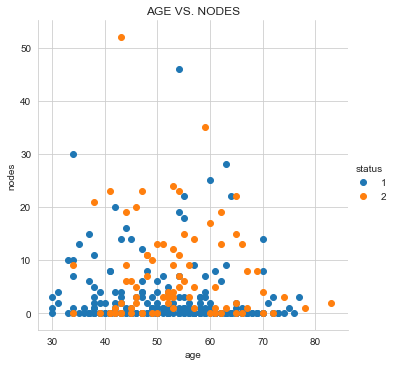

In [16]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'status', height = 5).map(plt.scatter, 'age', 'nodes').add_legend()
plt.title('AGE VS. NODES', loc = 'center')
plt.show()

##### age-year:

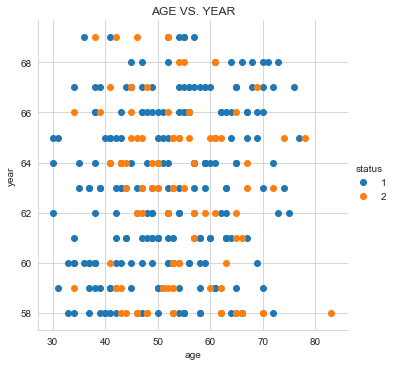

In [17]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'status', height = 5).map(plt.scatter, 'age', 'year').add_legend()
plt.title('AGE VS. YEAR', loc = 'center')
plt.show()

##### nodes-year

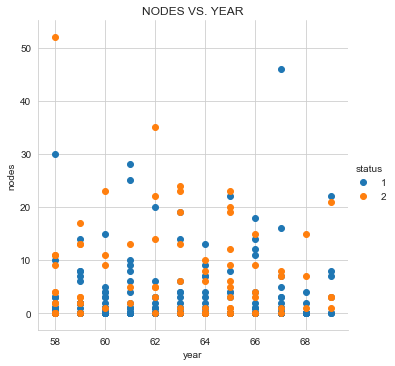

In [18]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'status', height = 5).map(plt.scatter, 'year', 'nodes').add_legend()
plt.title('NODES VS. YEAR', loc = 'center')
plt.show()

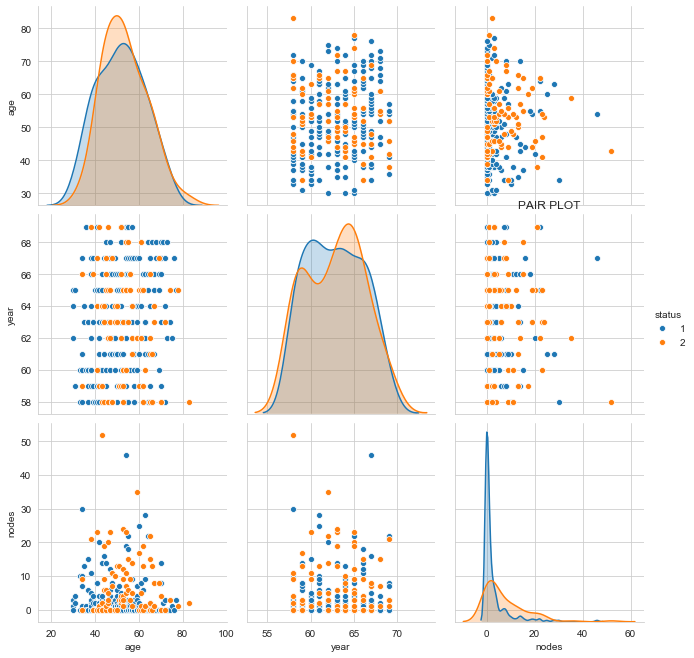

In [19]:
sns.pairplot(df,hue='status',height = 3)
plt.show()

**Observations**
1. No help at all from scatter plots.

**CONCLUSION**
1. Year of operation & Age of patient seem pretty much useless features as I cannot see any particular trend to seperate the status. Patient of any age can survive or die.
2. No. of nodes are slightly helpful but not that to classify single handedly. 
3. More than 75% of patients who survived had no. of nodes less than 2. So having nodes less than 1 or 2 definitely increases the chanaces of survival.